In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import numpy as np
import librosa  # library for music and audio analysis


In [ ]:
# Get the base directory (two levels up from 'notebooks/')
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Move up one level
DATASET_DIR = os.path.join(BASE_DIR, "dataset", "TESS Toronto emotional speech set data")

# Check if the dataset directory exists
if not os.path.exists(DATASET_DIR):
    print("Dataset directory does not exist!")
else:
    print("Dataset directory exists:", DATASET_DIR)

    # Extracting paths and labels
    path = []
    labels = []

    for dirname, _, filenames in os.walk(DATASET_DIR):
        for filename in filenames:
            if filename.endswith(".wav"):  # Ensure only .wav files are processed
                path.append(os.path.join(dirname, filename))
                label = filename.split('_')[-1].split('.')[0].lower()
                labels.append(label)



Dataset directory exists: c:\Users\Utkarsh yadav\Desktop\Speech Emotion Recognition\dataset\TESS Toronto emotional speech set data


In [39]:
df = pd.DataFrame()
df['speech'] = path
df['label'] = labels
df.head()

,speech,label
0,c:\Users\Utkarsh yadav\Desktop\Speech Emotion ...,angry
1,c:\Users\Utkarsh yadav\Desktop\Speech Emotion ...,angry
2,c:\Users\Utkarsh yadav\Desktop\Speech Emotion ...,angry
3,c:\Users\Utkarsh yadav\Desktop\Speech Emotion ...,angry
4,c:\Users\Utkarsh yadav\Desktop\Speech Emotion ...,angry


In [40]:
df.shape

(2800, 2)

<Axes: xlabel='count', ylabel='label'>

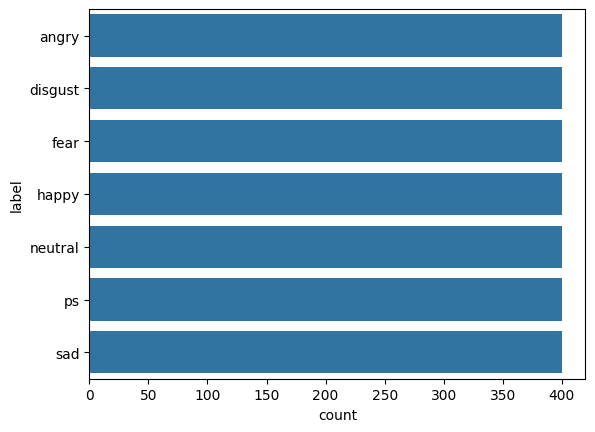

In [41]:
import seaborn as sns

sns.countplot(df['label'])

In [42]:
def extract(filename):
  y , sr  = librosa.load(filename, duration = 3, offset = .5)
  mfcc = np.mean(librosa.feature.mfcc(y = y , sr = sr, n_mfcc = 40), axis = 1)
  return mfcc

In [43]:
a = extract(df['speech'][0])
a       # a single speech convert into numeric form into 40 size of array

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666927e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57366073e-01, -1.83255327e+00,  2.02101663e-01,
        7.27551162e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292210e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585403e+00,  2.17123604e+01,  1.92169914e+01,  2.03489285e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722193e-01,  5.11131525e+00,
        9.56873894e+00,  5.45486879e+00,  2.50996351e+00, -1.82390785e+00,
        4.86896276e+00,  9.31392384e+00,  2.08914971e+00, -1.90649164e+00],
      dtype=float32)

[Text(0.5, 1.0, 'angry')]

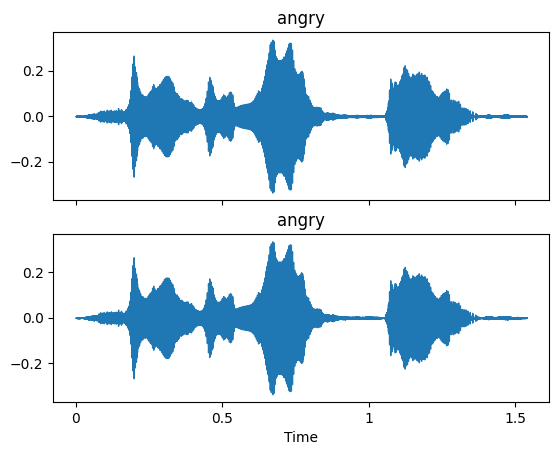

In [44]:
x_1, fs = librosa.load(df['speech'][0])
# And a second version, slightly faster.
x_2, fs = librosa.load(df['speech'][0])
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveshow(x_1, sr=fs, ax=ax[0])
ax[0].set(title=df['label'][0])
ax[0].label_outer()

librosa.display.waveshow(x_2, sr=fs, ax=ax[1])
ax[1].set(title=df['label'][0])

In [45]:
a_mfcc = df['speech'].apply(lambda x: extract(x))  # transform every speech into array

In [46]:
a_mfcc           # and also we did not do scalling here because here amplitude of voice is same if data is derived from different user then it requires

0       [-396.9862, 77.44054, -19.59279, -21.666693, -...
1       [-465.73267, 98.77373, 0.65600884, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550481, -0.21709459,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54756, 24.800041, 43.04809, 4...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.90637, 28.373262, 39.57707, -2....
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [47]:
x = [x for x in a_mfcc]   # now here we convert it into tensor by expanding its dimension by 1
x = np.array(x)
x = np.expand_dims(x, -1)
x.shape

(2800, 40, 1)

In [48]:
from sklearn.preprocessing import OneHotEncoder   # tranform label also numeric

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [49]:
enc.get_feature_names_out()

array(['label_angry', 'label_disgust', 'label_fear', 'label_happy',
       'label_neutral', 'label_ps', 'label_sad'], dtype=object)

In [50]:
y = y.toarray()

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout


model = Sequential([

                    LSTM(256, return_sequences= False , input_shape= (40,1) ),
                    Dropout(.2),
                    Dense(128, activation = 'relu'),
                    Dropout(.1),
                    Dense(64, activation = 'relu'),
                    Dropout(.1),
                    Dense(7 , activation = 'softmax')             # bcoz we have 7 different lables or say values
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])   # use categorical_crossentropy because data is in one hot encode from
model.summary()

c:\Users\Utkarsh yadav\Desktop\Speech Emotion Recognition\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4241 - loss: 1.4697 - val_accuracy: 0.4500 - val_loss: 2.0857
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7998 - loss: 0.5324 - val_accuracy: 0.3250 - val_loss: 2.3961
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9208 - loss: 0.2477 - val_accuracy: 0.3607 - val_loss: 2.1391
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9459 - loss: 0.1808 - val_accuracy: 0.5857 - val_loss: 2.0011
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9579 - loss: 0.1355 - val_accuracy: 0.5661 - val_loss: 1.9249


In [57]:
import json
from sklearn.preprocessing import LabelEncoder

# Define the correct model directory path
base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Moves one level up from 'notebooks'
model_dir = os.path.join(base_dir, "model")  # Adjust to the correct path

# Create the model directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(model_dir, "trained_model.h5")
model.save(model_path)
print(f"Model saved successfully at: {model_path}")



Model saved successfully at: c:\Users\Utkarsh yadav\Desktop\Speech Emotion Recognition\model\trained_model.h5
